<a href="https://colab.research.google.com/github/Pmskabir1234/Machine_Learning/blob/main/PneumoniaDeteciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Introduction: Pneumonia Detection through X-ray using CNN

This project develops a Convolutional Neural Network (CNN) to detect pneumonia from chest X-ray images. By automating diagnosis, it aims to provide a faster and more accurate alternative to manual examination. The process involves data preparation, CNN model design and training, and performance evaluation. This work highlights the potential of deep learning in medical image analysis for improved patient care.

In [8]:
# .kaggle folder
!mkdir -p ~/.kaggle

# Copy kaggle.json to that folder
!cp kaggle.json ~/.kaggle/

# Change permissions (important!)
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 96% 2.20G/2.29G [00:15<00:02, 48.2MB/s]
100% 2.29G/2.29G [00:15<00:00, 160MB/s] 


In [10]:
!unzip chest-xray-pneumonia.zip
dataset_path = 'chest_xray/'  # this is the root folder for train/val/test


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [12]:
!pip install tensorflow

In [13]:
#data augmentation and normalization
train_datagen = ImageDataGenerator(
  rescale = 1./255,             #normalizing pixel for faster convergence
  rotation_range = 20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

#for val dataset we'll only rescale, no other changes to make our model run properly
val_datagen = ImageDataGenerator(rescale=1./255)

#load training images
train_generator = train_datagen.flow_from_directory(
    'chest_xray/train',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

#load validation images
val_generator = val_datagen.flow_from_directory(
    'chest_xray/val',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Now we'll be building our **CNN model**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import matplotlib.pyplot as plt


In [15]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape = (150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation="sigmoid")
])
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
history =  model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 10,
    verbose = 1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 570ms/step - accuracy: 0.7196 - loss: 0.7239 - val_accuracy: 0.6250 - val_loss: 0.8100
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 561ms/step - accuracy: 0.8280 - loss: 0.3598 - val_accuracy: 0.7500 - val_loss: 0.6949
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 565ms/step - accuracy: 0.8624 - loss: 0.3095 - val_accuracy: 0.7500 - val_loss: 0.4604
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 562ms/step - accuracy: 0.8638 - loss: 0.2965 - val_accuracy: 0.6875 - val_loss: 0.6829
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 560ms/step - accuracy: 0.8833 - loss: 0.2824 - val_accuracy: 0.8125 - val_loss: 0.7020
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 562ms/step - accuracy: 0.8915 - loss: 0.2696 - val_accuracy: 0.6875 - val_loss: 0.7487
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 538ms/step - accuracy: 0.8867 - loss: 0.2600 - val_accuracy: 0.8750 - val_loss: 0.5731
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 562ms/step - accuracy: 0.8937 - loss: 0

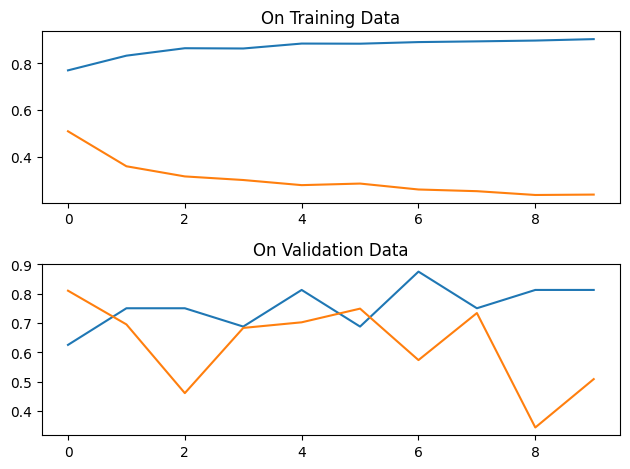

In [16]:
def model_analysis(history):
  fig,axs = plt.subplots(2,1)
  axs[0].plot(history.history['accuracy'],label='Accuracy')
  axs[0].plot(history.history['loss'],label='Loss')
  axs[1].plot(history.history['val_accuracy'],label='Val_Accuracy')
  axs[1].plot(history.history['val_loss'],label='Val_Loss')
  axs[0].set_title("On Training Data")
  axs[1].set_title("On Validation Data")
  plt.tight_layout()
  plt.show()

model_analysis(history)

In [19]:
#well this is time to save the our model
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
model.save("/content/drive/MyDrive/models/pneumonia_model.h5")